# Prediciting the User Rating for Amazon's bestselling books

1)The bestselling books data set was obtained from Kaggle.

2)The books were segmented based on genre, author and year published

3)The price distirbution for each genre was visualized

4)Finally the User ratings were predicted using Linear, Polynomial, Ridge Regression, Decision Tree, Gradient boost  regressor and Elastic Net-Gridsearch CV 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\bryan\Downloads\datasets\bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Ordering Authors by their average user rating

In [5]:
df[['Author','User Rating','Reviews','Price']].groupby('Author').mean().sort_values(by='User Rating',ascending=False).head(25)

,User Rating,Reviews,Price
Author,,,
Jill Twiss,4.900000,11881.000000,13.000000
Nathan W. Pyle,4.900000,9382.000000,6.000000
Chip Gaines,4.900000,7861.000000,5.000000
Rush Limbaugh,4.900000,5493.000000,12.000000
Bill Martin Jr.,4.900000,14344.000000,5.000000
Emily Winfield Martin,4.900000,8842.000000,10.000000
Pete Souza,4.900000,3192.000000,22.000000
Patrick Thorpe,4.900000,5396.000000,20.000000
Lin-Manuel Miranda,4.900000,5867.000000,54.000000


Top 25 most expensive books

In [6]:
df.nlargest(25,['Price'])

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction


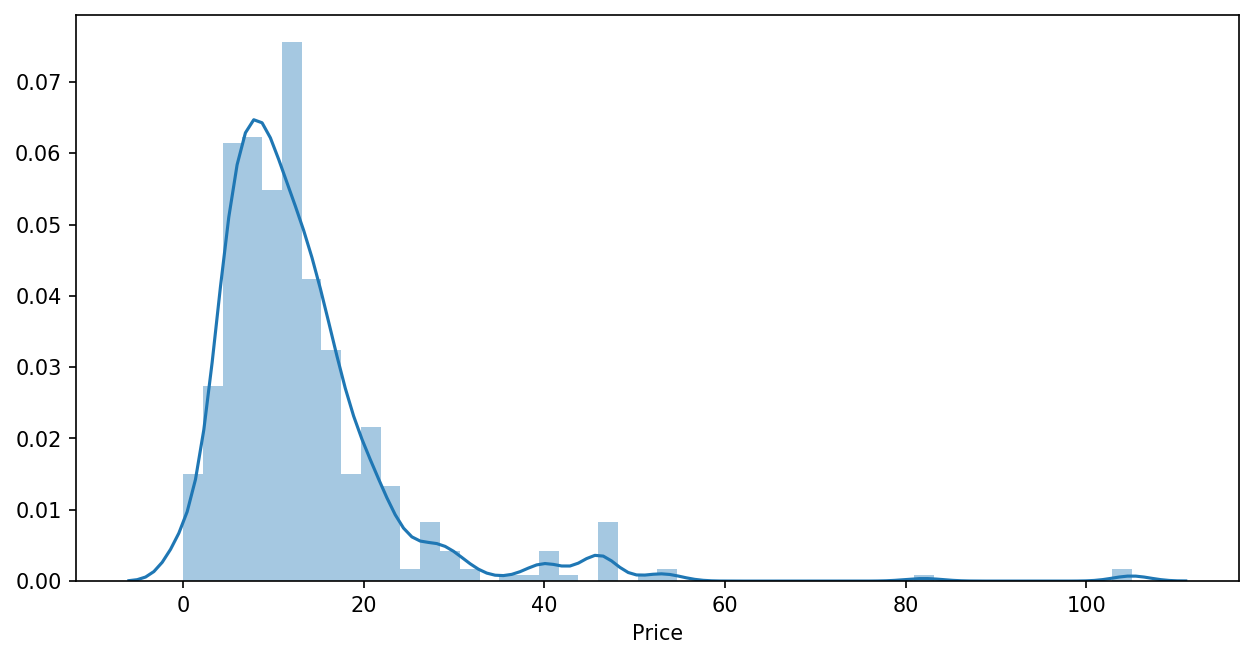

In [7]:
plt.figure(figsize=(10,5),dpi=150)
sns.distplot(df["Price"])

Median book price

In [8]:
np.median(df["Price"])

11.0

**Creating a dataframe of only fiction books**

In [9]:
df_fict=df[df['Genre']=='Fiction']
df_fict

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


Correlation between the parameters

In [10]:
df[['User Rating','Reviews','Price','Year']].corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


In [11]:
np.median(df_fict['Price'])

9.0

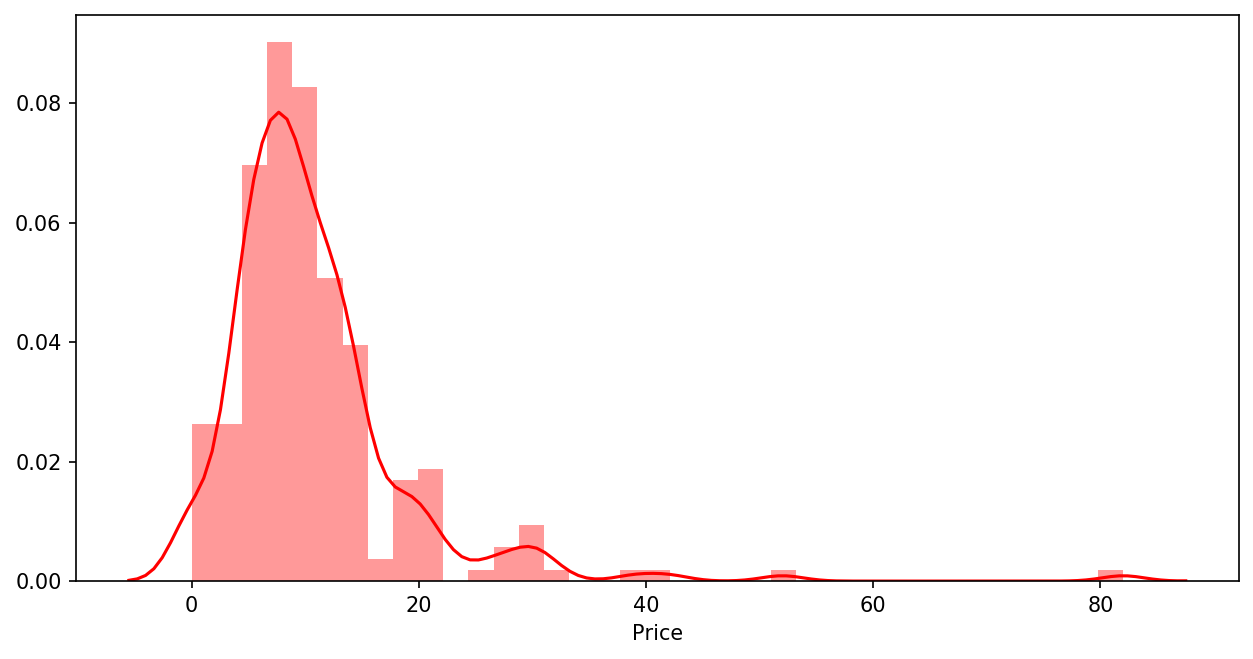

In [12]:
plt.figure(figsize=(10,5),dpi=150)
sns.distplot(df_fict["Price"],color='red')

In [13]:
df[['Author','User Rating','Reviews','Price']].groupby('Author').mean().sort_values(by=['User Rating','Price'],ascending=False).head(25)

,User Rating,Reviews,Price
Author,,,
Lin-Manuel Miranda,4.900000,5867.000000,54.000000
Pete Souza,4.900000,3192.000000,22.000000
Patrick Thorpe,4.900000,5396.000000,20.000000
Jill Twiss,4.900000,11881.000000,13.000000
Rush Limbaugh,4.900000,5493.000000,12.000000
Emily Winfield Martin,4.900000,8842.000000,10.000000
Sherri Duskey Rinker,4.900000,7038.000000,7.000000
Nathan W. Pyle,4.900000,9382.000000,6.000000
Bill Martin Jr.,4.900000,14344.000000,5.000000


**Creating a dataframe of non-fiction books**

In [14]:
df_nf=df[df['Genre']=='Non Fiction']
df_nf

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
...,...,...,...,...,...,...,...
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


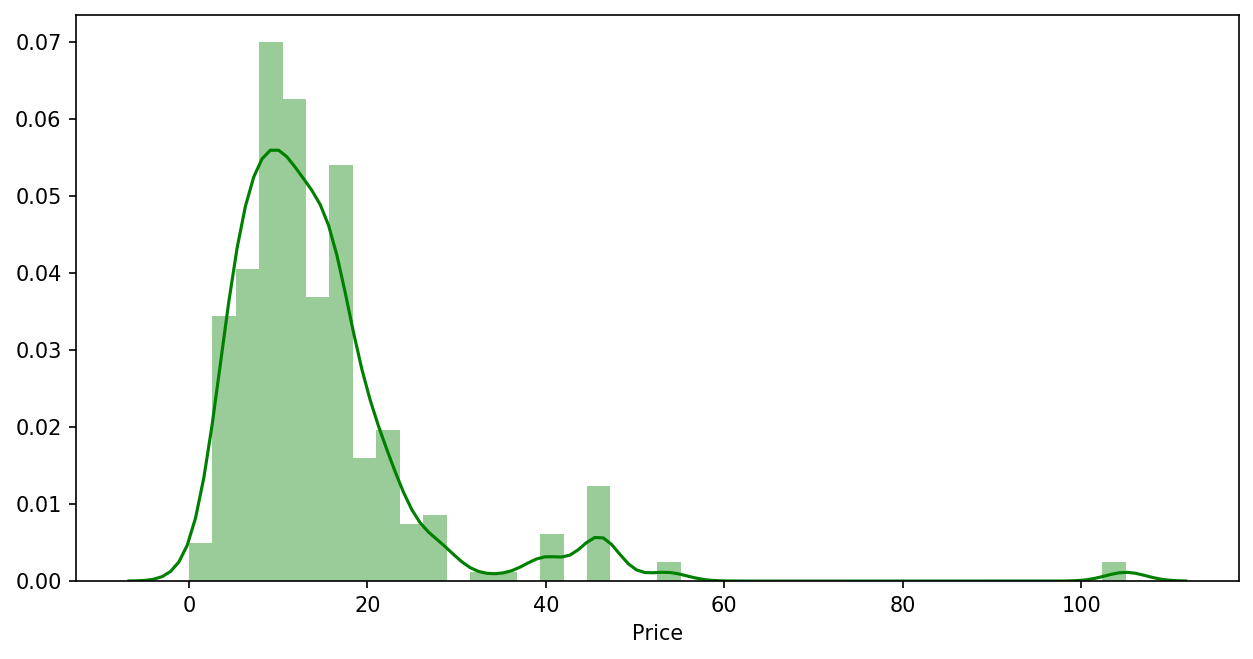

In [15]:
plt.figure(figsize=(10,5),dpi=150)
sns.distplot(df_nf['Price'],color='green')

In [16]:
np.median(df_nf['Price'])

12.0

In [17]:
df_nf[['Price','Reviews','User Rating','Year']].corr()

,Price,Reviews,User Rating,Year
Price,1.000000,-0.145563,-0.134869,-0.165569
Reviews,-0.145563,1.000000,0.315612,0.414921
User Rating,-0.134869,0.315612,1.000000,0.228196
Year,-0.165569,0.414921,0.228196,1.000000


Top 25 Authors based on User Ratings

In [18]:
df_nf[['Author','Price','User Rating','Reviews']].groupby('Author').mean().sort_values(by=['User Rating','Price'],ascending=False).head(25)

,Price,User Rating,Reviews
Author,,,
Lin-Manuel Miranda,54.000000,4.900000,5867.0
Pete Souza,22.000000,4.900000,3192.0
Chip Gaines,5.000000,4.900000,7861.0
Sarah Young,8.000000,4.900000,19576.0
Mark R. Levin,13.000000,4.850000,4892.0
Brandon Stanton,15.666667,4.833333,3264.0
Julia Child,27.000000,4.800000,2926.0
Samin Nosrat,20.000000,4.800000,7802.0
Joanna Gaines,19.000000,4.800000,6821.5


Setting an initial number of publications value of 1 for all authors

In [19]:
df['num_publ']=1

In [20]:
df_num_publs=df[['Author','Price','num_publ']].groupby('Author').sum().sort_values(by='num_publ',ascending=False)
df_num_publs

,Price,num_publ
Author,,
Jeff Kinney,111,12
Gary Chapman,189,11
Suzanne Collins,147,11
Rick Riordan,109,11
American Psychological Association,460,10
...,...,...
David Grann,17,1
Larry Schweikart,2,1
David McCullough,16,1


In [21]:
df_num_publs['Avg price per book']=round(df_num_publs['Price']/df_num_publs['num_publ'],2)
df_num_publs

,Price,num_publ,Avg price per book
Author,,,
Jeff Kinney,111,12,9.25
Gary Chapman,189,11,17.18
Suzanne Collins,147,11,13.36
Rick Riordan,109,11,9.91
American Psychological Association,460,10,46.00
...,...,...,...
David Grann,17,1,17.00
Larry Schweikart,2,1,2.00
David McCullough,16,1,16.00


In [22]:
df.groupby(['Genre','Year']).mean()

User Rating       Reviews      Price  num_publ
Genre       Year                                                
Fiction     2009     4.591667   6534.333333  15.583333       1.0
            2010     4.615000   8409.250000   9.700000       1.0
            2011     4.619048  10335.285714  11.619048       1.0
            2012     4.495238  19896.238095  12.285714       1.0
            2013     4.545833  19986.833333  10.708333       1.0
            2014     4.631034  19382.862069  10.172414       1.0
            2015     4.652941  23706.117647   9.352941       1.0
            2016     4.715789  19563.263158  12.631579       1.0
            2017     4.737500  14611.833333   8.833333       1.0
            2018     4.738095  12710.428571   8.761905       1.0
            2019     4.820000  18507.150000   9.350000       1.0
Non Fiction 2009     4.576923   3026.230769  15.230769       1.0
            2010     4.520000   3526.533333  16.000000       1.0
            2011     4.513793   6482.758621  17.620690       1.0
            2012     4.558621   8162.931034  17.482759       1.0
            2013     4.561538   6739.346154  18.192308       1.0
            2014     4.609524  10994.952381  20.809524       1.0
            2015     4.645455   9353.484848  10.969697       1.0
            2016     4.654839  10906.387097  13.516129       1.0
            2017     4.588462  11297.538462  13.730769       1.0
            2018     4.617241  14813.862069  11.793103       1.0
            2019     4.686667  14159.133333  10.566667       1.0

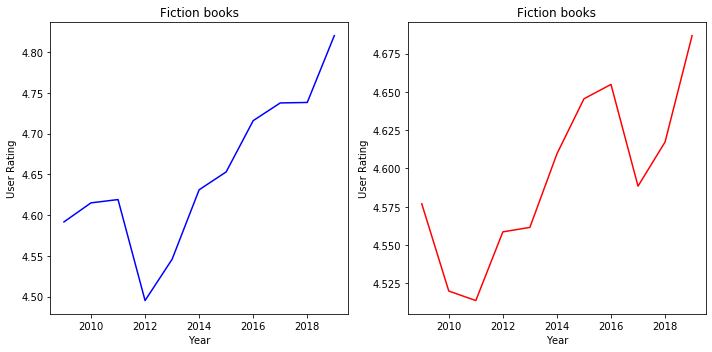

In [23]:
df_fict_gr_yr=df_fict.groupby('Year').mean().reset_index()
df_nf_gr_yr=df_nf.groupby('Year').mean().reset_index()

fig, ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(df_fict_gr_yr['Year'],df_fict_gr_yr['User Rating'],'b')
ax[1].plot(df_nf_gr_yr['Year'],df_nf_gr_yr['User Rating'],'r')

ax[0].set_title('Fiction books')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('User Rating')

ax[1].set_title('Fiction books')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('User Rating')

plt.tight_layout()

As can be seen in the plots above, the user rating has been improving over the years

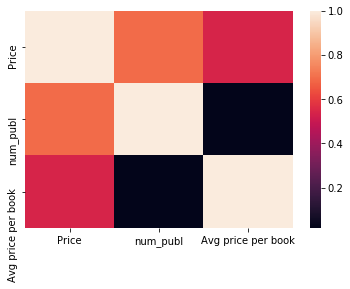

In [24]:
sns.heatmap(df_num_publs.corr())

There seems to be no correlation between the price of the book and the number of books published by the author i.e the 
popularity of the author

Text(0.5, 0, 'Number of books by Author')

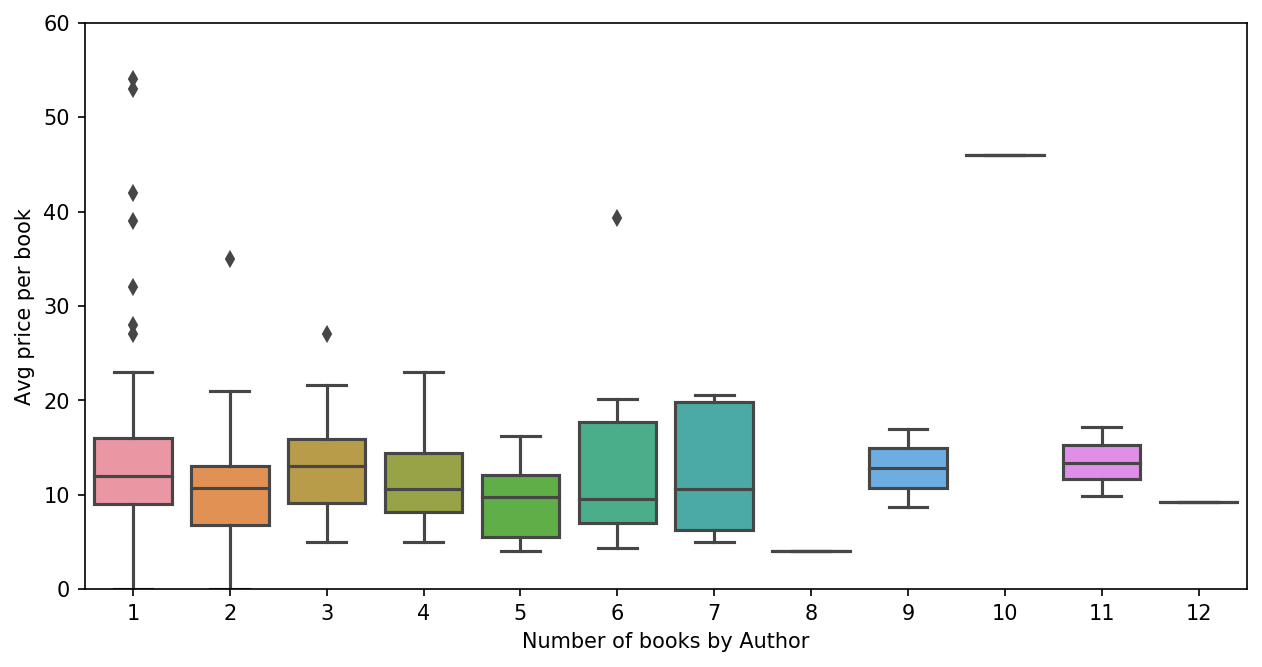

In [25]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(x='num_publ',y='Avg price per book',data=df_num_publs)
plt.ylim([0,60])
plt.xlabel('Number of books by Author')

Visualizing the difference in number of User Ratings per genre

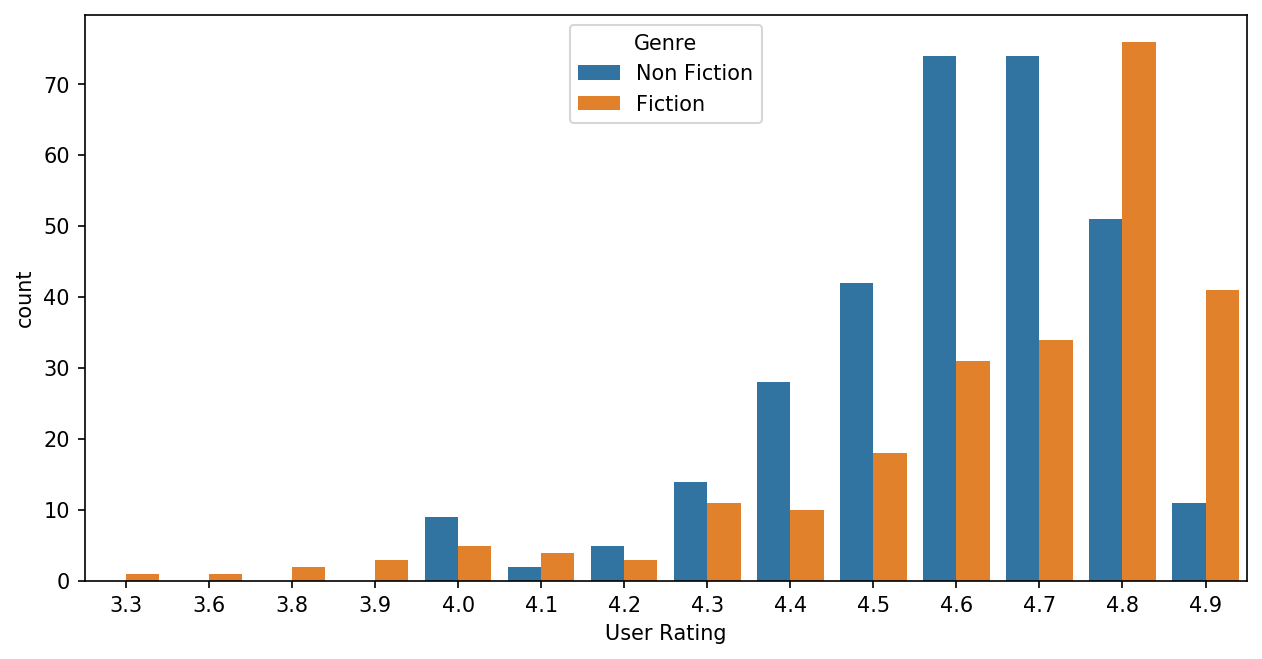

In [26]:
plt.figure(figsize=(10,5),dpi=150)
sns.countplot(df['User Rating'],hue=df['Genre'])

**BUILDING MODELS TO PREDICT THE USER RATINGS**

In [27]:
#Creating a dataframe of all authors having more than 1 occurence in the dataset

auth=pd.DataFrame(df['Author'].value_counts()).reset_index()
auth.columns=['Author','Occurences']
auth[auth['Occurences']>1]

,Author,Occurences
0,Jeff Kinney,12
1,Suzanne Collins,11
2,Rick Riordan,11
3,Gary Chapman,11
4,American Psychological Association,10
...,...,...
113,Johanna Basford,2
114,Abraham Verghese,2
115,Sheryl Sandberg,2
116,Craig Smith,2


In [28]:
#Assigning the number of books published to the Author Column in the dataframe
def books_published(author):
    if round(int(auth[auth['Author']==author]['Occurences']),0)==1:
        return 'One book'
    else:
        return "More than one book"

In [29]:
df['Author']=df['Author'].apply(books_published)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,num_publ
0,10-Day Green Smoothie Cleanse,One book,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,More than one book,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,One book,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),One book,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",One book,4.8,7665,12,2019,Non Fiction,1
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),More than one book,4.9,9413,8,2019,Fiction,1
546,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2016,Non Fiction,1
547,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2017,Non Fiction,1
548,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2018,Non Fiction,1


In [30]:
df['Author'].value_counts()

More than one book    420
One book              130
Name: Author, dtype: int64

In [31]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,num_publ
0,10-Day Green Smoothie Cleanse,One book,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,More than one book,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,One book,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),One book,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",One book,4.8,7665,12,2019,Non Fiction,1
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),More than one book,4.9,9413,8,2019,Fiction,1
546,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2016,Non Fiction,1
547,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2017,Non Fiction,1
548,You Are a Badass: How to Stop Doubting Your Gr...,More than one book,4.7,14331,8,2018,Non Fiction,1


Simple Linear regression

In [32]:
df1= pd.get_dummies(data=df['Author'], drop_first=True)
df = pd.concat([df, df1], axis=1)
df.drop('Author', axis=1, inplace=True)

df2 = pd.get_dummies(data=df['Genre'], drop_first=True)
df = pd.concat([df, df2], axis=1)
df.drop('Genre', axis=1, inplace=True)
df.drop(['Name','num_publ'],axis=1,inplace=True)
df.head()

,User Rating,Reviews,Price,Year,One book,Non Fiction
0,4.7,17350,8,2016,1,1
1,4.6,2052,22,2011,0,0
2,4.7,18979,15,2018,1,1
3,4.7,21424,6,2017,1,0
4,4.8,7665,12,2019,1,1


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
lm=LinearRegression()

In [35]:
x=df.drop('User Rating',axis=1)
y=df['User Rating']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [37]:
lm.fit(x_train,y_train)
yhat_LM=lm.predict(x_test)

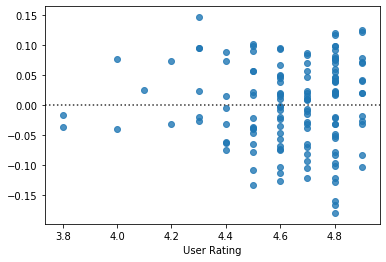

In [38]:
sns.residplot(y_test,yhat_LM)

In [39]:
#Root mean Square 
rmse_LM=round(np.sqrt(mean_squared_error(yhat_LM,y_test)),7)
rmse_LM

0.2079929

Verifying the performance of Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
scale=StandardScaler()

In [42]:
error=[]
for d in range(1,10):
    poly=PolynomialFeatures(degree=d)
    scaled_x=scale.fit_transform(x)
    x_poly=poly.fit_transform(scaled_x)
    xtrain_poly, xtest_poly, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=101)
    lm.fit(xtrain_poly,y_train)
    yhat_poly=lm.predict(xtest_poly)
    rmse_poly=round(np.sqrt(mean_squared_error(yhat_poly,y_test)),5)
    error.append(rmse_poly)

(0, 10)

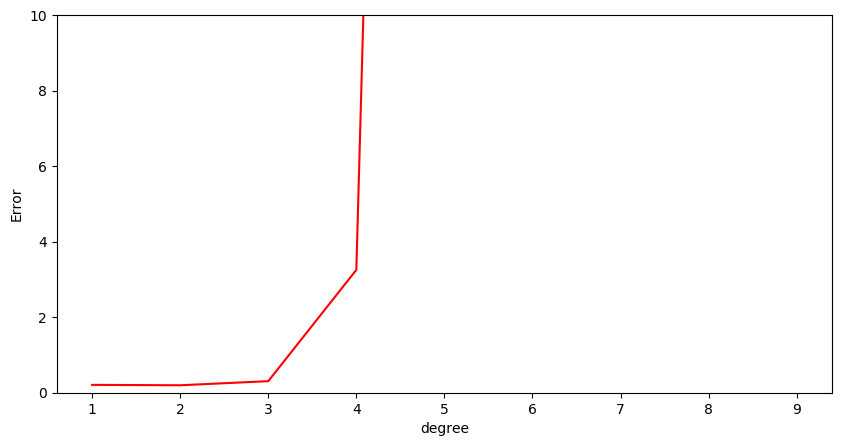

In [43]:
#plotting the poly degree vs error 
plt.figure(figsize=(10,5),dpi=100)
plt.plot(range(1,10),error,'r')
plt.xlabel('degree')
plt.ylabel('Error')
plt.ylim([0,10])

In [44]:
#Finding the polynomial degree of least error
error.index(min(error))

1

In [45]:
poly=PolynomialFeatures(degree=1)
scaled_x=scale.fit_transform(x)
x_poly=poly.fit_transform(scaled_x)
xtrain_poly, xtest_poly, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=101)
lm.fit(xtrain_poly,y_train)
yhat_poly=lm.predict(xtest_poly)
rmse_poly=round(np.sqrt(mean_squared_error(yhat_poly,y_test)),7)
rmse_poly

0.2079929

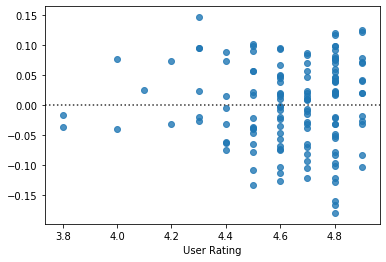

In [46]:
sns.residplot(y_test,yhat_poly)

   Verifying the performance of Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dtree = DecisionTreeRegressor(random_state=101)
dtree.fit(x_train, y_train)
yhat_dtree = dtree.predict(x_test)

In [49]:
rmse_dtree = round(np.sqrt(mean_squared_error(y_test, yhat_dtree)),7)
rmse_dtree

0.2413729

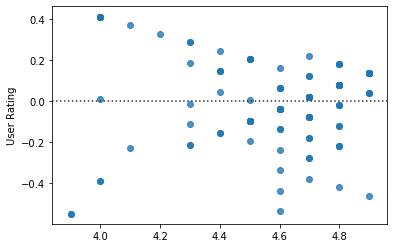

In [50]:
sns.residplot(yhat_dtree,y_test)

Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gbr=GradientBoostingRegressor(alpha=0.001)

In [53]:
gbr.fit(x_train,y_train)
yhat_gbr=gbr.predict(x_test)

In [54]:
rmse_gbr = round(np.sqrt(mean_squared_error(y_test, yhat_gbr)),7)
rmse_gbr

0.2030337

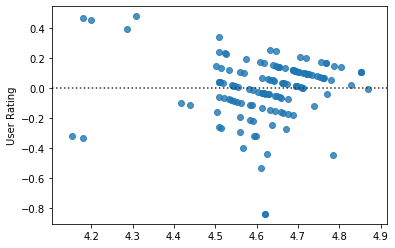

In [55]:
sns.residplot(yhat_gbr,y_test)

Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1.1,1,0,0.1,0.01,0.001,0.0001] , "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
grid = GridSearchCV(ridge, param_grid=params,cv=5,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.1, 1, 0, 0.1, 0.01, 0.001, 0.0001],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [57]:
grid.best_params_

{'alpha': 1.1, 'solver': 'cholesky'}

In [58]:
yhat_ridge=grid.predict(x_test)
rmse_ridge=round(np.sqrt(mean_squared_error(y_test, yhat_ridge)),7)
rmse_ridge

0.2079886

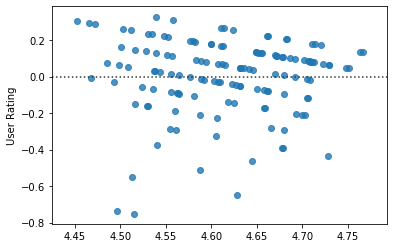

In [59]:
sns.residplot(yhat_ridge,y_test)

Elastic Net CV

In [60]:
from sklearn.linear_model import ElasticNetCV

In [61]:
net=ElasticNetCV()
params={'l1_ratio':[0.001,0.01,0.1,0.5,1], 'eps':[0.001,0.005,0.01,0.05,0.1]}
grid_net=GridSearchCV(estimator=net,param_grid=params,cv=5,verbose=1)
grid_net.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    9.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNetCV(alphas=None, copy_X=True, cv=None,
                                    eps=0.001, fit_intercept=True, l1_ratio=0.5,
                                    max_iter=1000, n_alphas=100, n_jobs=None,
                                    normalize=False, positive=False,
                                    precompute='auto', random_state=None,
                                    selection='cyclic', tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'eps': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [62]:
grid_net.best_params_

{'eps': 0.001, 'l1_ratio': 1}

In [63]:
grid_net.best_estimator_

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [64]:
yhat_net=grid_net.predict(x_test)
rmse_net=round(np.sqrt(mean_squared_error(y_test, yhat_net)),7)
rmse_net

0.2119621

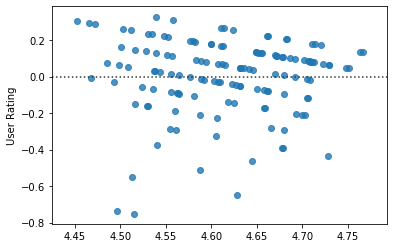

In [65]:
sns.residplot(yhat_ridge,y_test)

Plotting the RMSE for each algorithm used

In [66]:
#Dataframe of all the RMSE values
rmse_dict={'Linear Regression':rmse_LM,'Polynomial Regression':rmse_poly,'Decision Tree Regressor':rmse_dtree,'Gradient Boosting Regressor':rmse_gbr,'Ridge Regression':rmse_ridge, 'Elastic Net CV':rmse_net}

In [67]:
df_rmse=pd.DataFrame([rmse_dict]).transpose().reset_index()

In [68]:
df_rmse.rename(columns={'index':'Algorithm',0:'RMSE'},inplace=True)
df_rmse

,Algorithm,RMSE
0,Linear Regression,0.207993
1,Polynomial Regression,0.207993
2,Decision Tree Regressor,0.241373
3,Gradient Boosting Regressor,0.203034
4,Ridge Regression,0.207989
5,Elastic Net CV,0.211962


In [69]:
df_rmse=df_rmse.sort_values(by='RMSE')
df_rmse

,Algorithm,RMSE
3,Gradient Boosting Regressor,0.203034
4,Ridge Regression,0.207989
0,Linear Regression,0.207993
1,Polynomial Regression,0.207993
5,Elastic Net CV,0.211962
2,Decision Tree Regressor,0.241373


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

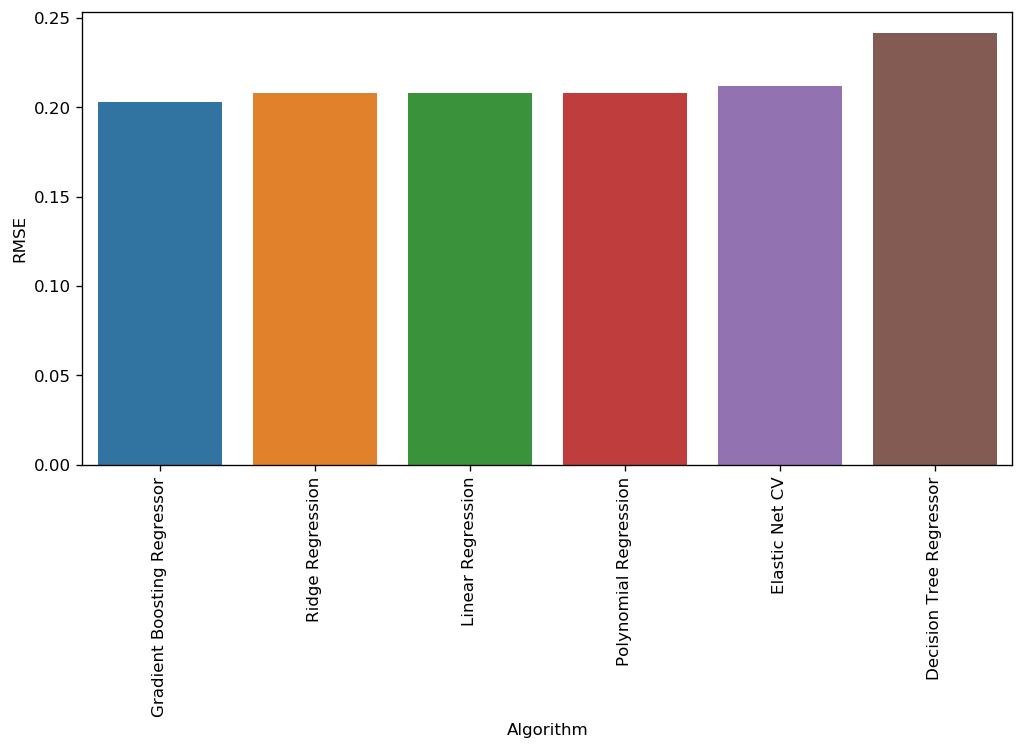

In [70]:
plt.figure(figsize=(10,5),dpi=120)
sns.barplot(x='Algorithm',y='RMSE',data=df_rmse)
plt.xticks(rotation=90)

## Conclusion

The best performing model was the Gradient boosting regressor with the lowest Root mean Square Error and the most porly performing model for the dataset was the Decision Tree Regressor